
**1. Introduction**  
Wage development is a socially important topic because it is about the welfare of the population. It
appears especially in connection with wage settlements, but is also a recurring theme in
the public debate. How is the income distribution between different occupational groups and how has
wage developments been over years? In this context, real wage development is particularly important because it tells
how wages have developed in relation to inflation.

**2. Litteraturgjennomgang**


**3.Theory**  
In this thesis, I will first look at price developments in Norway in the period 2015-2020 measured by the Consumer Price Index (CPI), then look at nominal wage developments in the same period for the largest industries. I will then create a wage index with 2015 = 100. Finally, I will compile the price index and wage index to assess real wage developments as a whole and for the selected industries.
I have obtained data from Statistics Norway (SSB) for the Consumer Price Index in the form of a csv file, and for wage data in the form of a json file.

* Data of Consumer Price Index (CPI) can also be collected directly from table 03013: Konsumprisindeks, etter konsumgruppe (2015=100) 1979M01 - 2021M10  
  https://www.ssb.no/statbank/table/03013  
  The dataset is available on a monthly basis. I have therefore calculated the average for each of the years 2015-2020.

* Data of yearwages can also be collected directly from table 11417: Årslønn, etter næring (19 grupper) 2015 - 2020.  
  https://www.ssb.no/statbank/table/11417/  
  
 The time series are relatively short because yearwage-data is only available for the period 2015-2020.

**4.Analysis**

4.1 Price development in the period 2015-2020 measured by the Consumer Price Index (CPI)

In [1]:
# I download necessary packages for the analysis
import pandas as pd
import numpy as np
import statistics
from matplotlib import pyplot as plt

In [2]:
# I download data on price development from Statistisk sentralbyrå 
df = pd.read_csv("https://data.ssb.no/api/v0/dataset/1086.csv?l", sep = ";", decimal=",", encoding = "ISO-8859-1")
print(df)

           konsumgruppe    måned             statistikkvariabel  \
0     TOTAL Totalindeks  1979M01    Konsumprisindeks (2015=100)   
1     TOTAL Totalindeks  1979M01        Månedsendring (prosent)   
2     TOTAL Totalindeks  1979M01  12-måneders endring (prosent)   
3     TOTAL Totalindeks  1979M02    Konsumprisindeks (2015=100)   
4     TOTAL Totalindeks  1979M02        Månedsendring (prosent)   
...                 ...      ...                            ...   
1537  TOTAL Totalindeks  2021M09        Månedsendring (prosent)   
1538  TOTAL Totalindeks  2021M09  12-måneders endring (prosent)   
1539  TOTAL Totalindeks  2021M10    Konsumprisindeks (2015=100)   
1540  TOTAL Totalindeks  2021M10        Månedsendring (prosent)   
1541  TOTAL Totalindeks  2021M10  12-måneders endring (prosent)   

      03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel  
0                                                  25.3                         
1                                

I collect the variable "Konsumprisindeks (2015=100)" and name it as "cpi"

In [3]:
cpi = df[df['statistikkvariabel'] == 'Konsumprisindeks (2015=100)']
cpi.head()

,konsumgruppe,måned,statistikkvariabel,"03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel"
0,TOTAL Totalindeks,1979M01,Konsumprisindeks (2015=100),25.3
3,TOTAL Totalindeks,1979M02,Konsumprisindeks (2015=100),25.4
6,TOTAL Totalindeks,1979M03,Konsumprisindeks (2015=100),25.5
9,TOTAL Totalindeks,1979M04,Konsumprisindeks (2015=100),25.6
12,TOTAL Totalindeks,1979M05,Konsumprisindeks (2015=100),25.7


I select "måned" and "03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel"

In [4]:
cpi = cpi[['måned', '03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel']]
cpi.head()

,måned,"03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel"
0,1979M01,25.3
3,1979M02,25.4
6,1979M03,25.5
9,1979M04,25.6
12,1979M05,25.7


I rename "03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel" to "CPI".

In [5]:
cpi.rename(columns={'03013: Konsumprisindeks, etter konsumgruppe, måned og statistikkvariabel': 'CPI'}, inplace=True)
cpi.head()

,måned,CPI
0,1979M01,25.3
3,1979M02,25.4
6,1979M03,25.5
9,1979M04,25.6
12,1979M05,25.7


In [6]:
cpi.reset_index()

,index,måned,CPI
0,0,1979M01,25.3
1,3,1979M02,25.4
2,6,1979M03,25.5
3,9,1979M04,25.6
4,12,1979M05,25.7
...,...,...,...
509,1527,2021M06,115.3
510,1530,2021M07,116.3
511,1533,2021M08,116.3
512,1536,2021M09,117.5


In [7]:
# checking the type of the variables
type('måned)')
type('CPI')

str

I calculate the mean of each year and put it in a new table "CPI".

In [8]:
cpi_2015 = cpi.loc[(cpi['måned'] >= '2015M01') & (cpi['måned'] <= '2015M12')]
cpi_2015_mean=statistics.mean(cpi_2015['CPI'])

In [9]:
cpi_2016 = cpi.loc[(cpi['måned'] >= '2016M01') & (cpi['måned'] <= '2016M12')]
cpi_2016_mean=statistics.mean(cpi_2016['CPI'])

In [10]:
cpi_2017 = cpi.loc[(cpi['måned'] >= '2017M01') & (cpi['måned'] <= '2017M12')]
cpi_2017_mean=statistics.mean(cpi_2017['CPI'])

In [11]:
cpi_2018 = cpi.loc[(cpi['måned'] >= '2018M01') & (cpi['måned'] <= '2018M12')]
cpi_2018_mean=statistics.mean(cpi_2018['CPI'])

In [12]:
cpi_2019 = cpi.loc[(cpi['måned'] >= '2019M01') & (cpi['måned'] <= '2019M12')]
cpi_2019_mean=statistics.mean(cpi_2019['CPI'])

In [13]:
cpi_2020 = cpi.loc[(cpi['måned'] >= '2020M01') & (cpi['måned'] <= '2020M12')]
cpi_2020_mean=statistics.mean(cpi_2020['CPI'])                                                       

In [14]:
# list of strings
year = [2015, 2016, 2017, 2018, 2019, 2020]
  
# list of years
cpi_mean = [cpi_2015_mean, cpi_2016_mean, cpi_2017_mean, cpi_2018_mean, cpi_2019_mean, cpi_2020_mean ]
  
# both lists, with columns specified
CPI = pd.DataFrame(list(zip(year, cpi_mean)),
               columns =['year', 'CPI'])
CPI = round(CPI, 1)
CPI

,year,CPI
0,2015,100.0
1,2016,103.6
2,2017,105.5
3,2018,108.4
4,2019,110.8
5,2020,112.2


We make a plot of development for the Consumer Price Index (CPI).

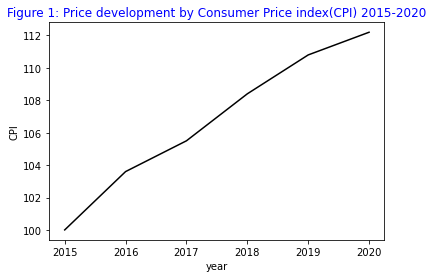

In [15]:
plt.plot(CPI['year'], CPI['CPI'], color="black" )
plt.xlabel('year')
plt.ylabel('CPI')
plt.title("Figure 1: Price development by Consumer Price index(CPI) 2015-2020", color="blue")
plt.show()

Comment:  
The index is set at 2015 = 100. We see from figure 1 that prices have increased by 12.2 percent from 2015 to 2020.

4.2 Development in year wages

We import necessary packages and data of yearwages from Statistisk Sentralbyrå(SSB)

In [16]:
from pyjstat import pyjstat
import requests

In [17]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/11417/'

In [18]:
payload = {
  "query": [
    {
      "code": "NACE2007",
      "selection": {
        "filter": "item",
        "values": [
          "A-S",
          "A",
          "B",
          "C",
          "D",
          "E",
          "F",
          "G",
          "H",
          "I",
          "J",
          "K",
          "L",
          "M",
          "N",
          "O",
          "P",
          "Q",
          "R",
          "S",
          "T",
          "U",
          "00"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Arslonn"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [19]:
yearwage = requests.post(POST_URL, json = payload)

In [20]:
print(yearwage)

<Response [200]>


In [21]:
yearwage = pyjstat.Dataset.read(yearwage.text)

In [22]:
year_wage = yearwage.write('dataframe') 

In [23]:
print(year_wage)

    næring (SN2007) statistikkvariabel    år     value
0     Alle næringer       Årslønn (kr)  2015  516000.0
1     Alle næringer       Årslønn (kr)  2016  522700.0
2     Alle næringer       Årslønn (kr)  2017  535400.0
3     Alle næringer       Årslønn (kr)  2018  550800.0
4     Alle næringer       Årslønn (kr)  2019  569900.0
..              ...                ...   ...       ...
133        Uoppgitt       Årslønn (kr)  2016  599300.0
134        Uoppgitt       Årslønn (kr)  2017  611400.0
135        Uoppgitt       Årslønn (kr)  2018  648400.0
136        Uoppgitt       Årslønn (kr)  2019  741500.0
137        Uoppgitt       Årslønn (kr)  2020  739500.0

[138 rows x 4 columns]



Comment:  
SSB comments that the yearwages of 2015 and 2016 are not comparable. I include these anyway because it has no significance for the analysis for the entire time period 2015-2020.

We rename 'år' to 'year' and value' to 'yearwage', and remove the column "statistikkvariabel"

In [24]:
year_wage.rename(columns={'value': 'yearwage', 'år': 'year'}, inplace=True)

In [25]:
year_wage = year_wage[['næring (SN2007)', 'year', 'yearwage']]
year_wage.head()

,næring (SN2007),year,yearwage
0,Alle næringer,2015,516000.0
1,Alle næringer,2016,522700.0
2,Alle næringer,2017,535400.0
3,Alle næringer,2018,550800.0
4,Alle næringer,2019,569900.0


We now make a pivot table with year numbers in the first column and then the industries

In [26]:
year_wage_industries = pd.pivot_table(year_wage, index = 'year', columns = 'næring (SN2007)', values = 'yearwage')
year_wage_industries

næring (SN2007),Alle næringer,Annen tjenesteyting,Bergverksdrift og utvinning,Bygge- og anleggsvirksomhet,"Elektrisitets-, gass-, damp- og varmtvannsforsyning","Faglig, vitenskapelig og teknisk tjenesteyting",Finansierings- og forsikringsvirksomhet,Forretningsmessig tjenesteyting,Helse- og sosialtjenester,Industri,...,"Kultur, underholdning og fritid",Lønnet arbeid i private husholdninger,"Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning",Omsetning og drift av fast eiendom,Overnattings- og serveringsvirksomhet,Transport og lagring,Undervisning,Uoppgitt,"Vann, avløp, renovasjon","Varehandel, reparasjon av motorvogner"
year,,,,,,,,,,,,,,,,,,,,,
2015,516000.0,473200.0,836300.0,484200.0,659800.0,646500.0,746400.0,439700.0,468100.0,530200.0,...,447900.0,NaN,545000.0,622000.0,350200.0,521300.0,501300.0,NaN,476800.0,456300.0
2016,522700.0,481300.0,834000.0,498700.0,659000.0,652600.0,745700.0,443800.0,479000.0,534100.0,...,446000.0,435900.0,556400.0,633600.0,354200.0,524800.0,516100.0,599300.0,483200.0,465800.0
2017,535400.0,495200.0,841800.0,509600.0,690000.0,664800.0,770800.0,453600.0,495500.0,546400.0,...,459300.0,442400.0,576600.0,643700.0,360300.0,533100.0,523500.0,611400.0,500100.0,480900.0
2018,550800.0,506800.0,873900.0,524400.0,716000.0,683200.0,798400.0,466100.0,510000.0,560600.0,...,473500.0,452300.0,594900.0,660400.0,373500.0,545500.0,536800.0,648400.0,513600.0,494900.0
2019,569900.0,523600.0,896000.0,539800.0,743800.0,706100.0,816600.0,483200.0,528700.0,578600.0,...,488500.0,463900.0,616700.0,676600.0,388900.0,562700.0,552900.0,741500.0,527400.0,512800.0
2020,587600.0,544600.0,896700.0,555900.0,770300.0,725700.0,845300.0,495900.0,540900.0,591900.0,...,504400.0,478900.0,629100.0,712600.0,398700.0,574400.0,564200.0,739500.0,541100.0,532400.0


4.2.1. Yearwage in the different industries in the period 2015-2020.

Let us first look at the development of the yearwage in the different industries in the period 2015-2020. We remove the sum column "Alle næringer" and industries with NA. 

In [27]:
year_wage_year = pd.pivot_table(year_wage, index = 'næring (SN2007)', columns = 'year', values = 'yearwage')

In [28]:
year_wage_year_industries = year_wage_year.drop(['Alle næringer','Internasjonale organisasjoner og organer','Lønnet arbeid i private husholdninger','Uoppgitt'])
year_wage_year_industries

year,2015,2016,2017,2018,2019,2020
næring (SN2007),,,,,,
Annen tjenesteyting,473200.0,481300.0,495200.0,506800.0,523600.0,544600.0
Bergverksdrift og utvinning,836300.0,834000.0,841800.0,873900.0,896000.0,896700.0
Bygge- og anleggsvirksomhet,484200.0,498700.0,509600.0,524400.0,539800.0,555900.0
"Elektrisitets-, gass-, damp- og varmtvannsforsyning",659800.0,659000.0,690000.0,716000.0,743800.0,770300.0
"Faglig, vitenskapelig og teknisk tjenesteyting",646500.0,652600.0,664800.0,683200.0,706100.0,725700.0
Finansierings- og forsikringsvirksomhet,746400.0,745700.0,770800.0,798400.0,816600.0,845300.0
Forretningsmessig tjenesteyting,439700.0,443800.0,453600.0,466100.0,483200.0,495900.0
Helse- og sosialtjenester,468100.0,479000.0,495500.0,510000.0,528700.0,540900.0
Industri,530200.0,534100.0,546400.0,560600.0,578600.0,591900.0


Comment:  
In 2020, we find the highest year wages within "Bergverksdrift og utvinning" and "Finansierings- og forsikringsvirksomhet". The lowest year wages we find within "Overnattings- og serveringsvirksomhet"

We obtain data that describe general wage differences.

In [29]:
year_wage_year_industries = round(year_wage_year_industries.describe(),0)
year_wage_year_industries

year,2015,2016,2017,2018,2019,2020
count,19.0,19.0,19.0,19.0,19.0,19.0
mean,541337.0,548021.0,562521.0,579505.0,598100.0,615247.0
std,123538.0,121682.0,123797.0,129035.0,131279.0,132829.0
min,350200.0,354200.0,360300.0,373500.0,388900.0,398700.0
25%,462200.0,472400.0,488050.0,500850.0,518200.0,536650.0
50%,501300.0,516100.0,523500.0,536800.0,552900.0,564200.0
75%,634250.0,643100.0,654250.0,671800.0,691350.0,719150.0
max,836300.0,834000.0,841800.0,873900.0,896000.0,896700.0


Comment:  
The average annual salary has increased from NOK 541 336 in 2015 to NOK 615 247 in 2020 for all industries in the sample.
The lowest annual salary has been increased from NOK 350 200 in 2015 to NOK 398 700 in 2020. We find this within "Overnatting- og serveringsvirksomhet".
The highest annual salary in 2015 was NOK 836 300, this was increased to NOK 896 700 in 2020. We find these figures in "Bergverksdrift og utvinning".
The median annual salary has been increased from NOK 501 300 in 2015 to NOK 564 200 in 2020. We find this by sorting all wages in ascending order. The median salary measures that in 2020, 50 per cent of wage earners earned less than NOK 564 200.

4.2.2 Wage development for selected industries

We select all industries as well as the seven largest according to the proportion of employees. These industries represent about 70 percent of the employed.
- Alle næringer
- Bygge- og anleggsvirksomhet 8.6 %
- Forretningsmessig tjenesteyting 4.7 %
- Helse- og sosialtjenester 21 %
- Industri 7.7 %
- Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning 6.4 %
- Undervisning 8.4 %
- Varehandel, reparasjon av motorvogner 12.8 %

Source: Statistisk Sentralbyrå: Tabell 07984: Alder- og næringsfordeling (17 grupper) blant sysselsatte, etter kjønn. 4. kvartal (K) 2008 - 2020  
https://www.ssb.no/statbank/table/07984/

We reset the index and choose the variables

In [30]:
year_wage_industries = year_wage_industries.reset_index()

In [31]:
industries_wages = year_wage_industries[['year','Alle næringer', 'Bygge- og anleggsvirksomhet', 'Forretningsmessig tjenesteyting', 'Helse- og sosialtjenester',
                                     'Industri', 'Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning', 'Undervisning',
                                     'Varehandel, reparasjon av motorvogner']]
industries_wages

næring (SN2007),year,Alle næringer,Bygge- og anleggsvirksomhet,Forretningsmessig tjenesteyting,Helse- og sosialtjenester,Industri,"Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning",Undervisning,"Varehandel, reparasjon av motorvogner"
0,2015,516000.0,484200.0,439700.0,468100.0,530200.0,545000.0,501300.0,456300.0
1,2016,522700.0,498700.0,443800.0,479000.0,534100.0,556400.0,516100.0,465800.0
2,2017,535400.0,509600.0,453600.0,495500.0,546400.0,576600.0,523500.0,480900.0
3,2018,550800.0,524400.0,466100.0,510000.0,560600.0,594900.0,536800.0,494900.0
4,2019,569900.0,539800.0,483200.0,528700.0,578600.0,616700.0,552900.0,512800.0
5,2020,587600.0,555900.0,495900.0,540900.0,591900.0,629100.0,564200.0,532400.0


Comment:
In the sample of industries, we find the highest year wages in "Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning" with NOK 629 100 and
lowest year wages within Forretningsmessig tjenesteyting with NOK 495 900.


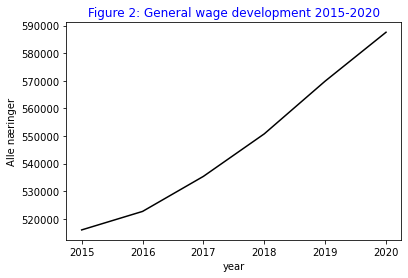

In [32]:

plt.plot(year_wage_industries['year'], year_wage_industries['Alle næringer'], color="black")
plt.xlabel('year')
plt.ylabel('Alle næringer')
plt.title("Figure 2: General wage development 2015-2020", color="blue")
plt.show()

Comment:
Figure 2 shows that the total nominal year wage has increased from NOK 516 000 in 2015 to 587 600 in 2020. This represents an increase of 13.9 per cent.

4.2.3 Wage index for selected industries

For the "CPI"-variable, the base year was set at 2015 = 100. To make the wage development comparable to the "CPI", we do the same with the wage variable "industries_wages_index".

We make a new dataframe for the index.

In [33]:
industries_wages_for_index = industries_wages.set_index('year')

In [34]:
industries_wages_index=100*industries_wages_for_index.div(industries_wages_for_index.iloc[0])
round(industries_wages_index,1)

næring (SN2007),Alle næringer,Bygge- og anleggsvirksomhet,Forretningsmessig tjenesteyting,Helse- og sosialtjenester,Industri,"Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning",Undervisning,"Varehandel, reparasjon av motorvogner"
year,,,,,,,,
2015,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2016,101.3,103.0,100.9,102.3,100.7,102.1,103.0,102.1
2017,103.8,105.2,103.2,105.9,103.1,105.8,104.4,105.4
2018,106.7,108.3,106.0,109.0,105.7,109.2,107.1,108.5
2019,110.4,111.5,109.9,112.9,109.1,113.2,110.3,112.4
2020,113.9,114.8,112.8,115.6,111.6,115.4,112.5,116.7


Comment:  
We see that for all industries in total, the year wages has increased nominally by 13.9 per cent in the period 2015-2020.
There are differences between the industries in our sample. The strongest growth in year wages is found in "Varehandel, reparasjon av motorvogner" by 16.7 per cent,
"Helse- og sosialtjenester" with 15.6 per cent and "Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning" with 15.4 per cent.
"Industrien" has experienced the lowest year wages growth with an 11.6 per cent nominal increase, and "Undervisning" with 12.5 per cent.
From the previous table, we remember that the lowest year wages in 2020 was in Forretningsmessig tjenesteyting. Here, there has been a nominal annual wage growth for the entire period of 12.8 per cent.


4.3 Real wage development  
We have now assessed the development of the Consumer Price Index "KPI", and we have looked at nominal annual wage growth. What does the picture look like if we
relate these and look at real wage development? Has there been a general decline in real wages / increase? Are there any of the industries in the sample that have performed better than others?
These questions will be addressed in the following.

We want to reset index because we want "year" to be index

In [35]:
industries_wages_index = industries_wages_index.reset_index()

We also want to change "year" to datatype "int"

In [36]:
industries_wages_index['year'] = industries_wages_index['year'].astype(int)

First we merge the "KPI" table and the "industries_wages_index" table

In [37]:
CPI_wages = CPI.merge(industries_wages_index, on='year', how='left')
round(CPI_wages,1) 

,year,CPI,Alle næringer,Bygge- og anleggsvirksomhet,Forretningsmessig tjenesteyting,Helse- og sosialtjenester,Industri,"Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning",Undervisning,"Varehandel, reparasjon av motorvogner"
0,2015,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2016,103.6,101.3,103.0,100.9,102.3,100.7,102.1,103.0,102.1
2,2017,105.5,103.8,105.2,103.2,105.9,103.1,105.8,104.4,105.4
3,2018,108.4,106.7,108.3,106.0,109.0,105.7,109.2,107.1,108.5
4,2019,110.8,110.4,111.5,109.9,112.9,109.1,113.2,110.3,112.4
5,2020,112.2,113.9,114.8,112.8,115.6,111.6,115.4,112.5,116.7


Comment:  
The table above shows that the nominal annual wage growth for all industries as a whole has been 13.9 per cent in the period 2015-2020. At the same time, inflation measured by the consumer price index "CPI" was 12.2 per cent. This implies a general real wage growth of 1.7 percentage points or 1.5 per cent. This will be discussed in more detail in the comments to the figures below.

4.3.1. General real wages development

<function matplotlib.pyplot.show(close=None, block=None)>

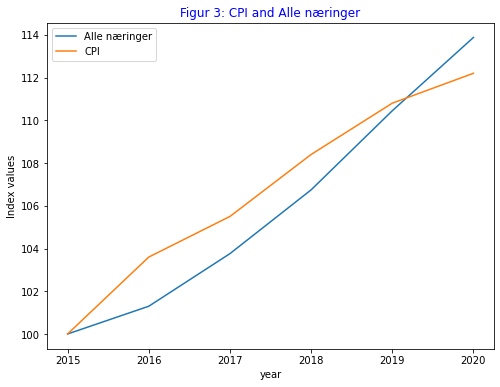

In [39]:
x = CPI_wages['year']
y = CPI_wages[['Alle næringer','CPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("Figur 3: CPI and Alle næringer", color="blue")
ax.plot(x,y)
ax.legend(['Alle næringer', 'CPI'])
plt.show

Comments:  
We see from figure 3 that for all industries as a whole, the Consumer Price Index (CPI) has been higher than the annual wage index every year until 2019. In From 2019 to 2020, wages increased more than prices.
This means that there has been a negative real wage development until 2019. 2020 is the only year of real wage growth and this is due to low price growth. For the entire period as a whole, there has nevertheless been real wage growth.

4.3.2. Real wages development within Bygge- og anleggsvirksomhet

<function matplotlib.pyplot.show(close=None, block=None)>

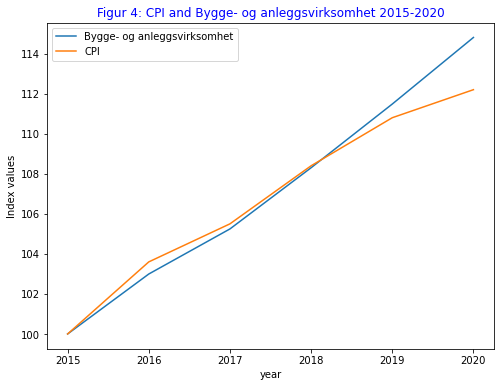

In [40]:
x = CPI_wages['year']
y = CPI_wages[['Bygge- og anleggsvirksomhet','CPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("Figur 4: CPI and Bygge- og anleggsvirksomhet 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Bygge- og anleggsvirksomhet', 'CPI'])
plt.show

Comment:
We see from figur 4 that wage developments in this industry have largely followed the consumer price index (CPI) until 2019. In 2019 and 2020, annual wage growth has been greater than inflation. For the entire period as a whole, there has been real wage growth.

4.3.3. Real wages development within Forretningsmessig tjenesteyting

<function matplotlib.pyplot.show(close=None, block=None)>

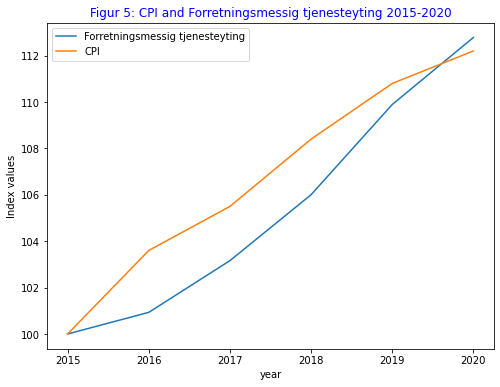

In [41]:
x = CPI_wages['year']
y = CPI_wages[['Forretningsmessig tjenesteyting','CPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("Figur 5: CPI and Forretningsmessig tjenesteyting 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Forretningsmessig tjenesteyting', 'CPI'])
plt.show

Comment:
This industry had the lowest salary in the sample measured in NOK. We see from Figure 5 that the industry in most years in the period has had lower annual wage growth than the general price growth. It is only in 2020 that there has been real wage growth. For the entire period as a whole, there has been real wage growth. This is due to the low price growth from 2019 to 2020.

4.3.4. Real wages development within Helse- og sosialtjenester

<function matplotlib.pyplot.show(close=None, block=None)>

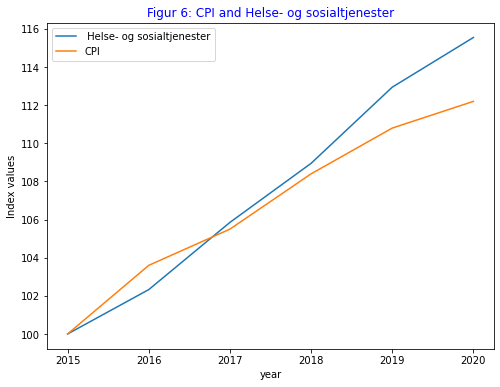

In [43]:
x = CPI_wages['year']
y = CPI_wages[['Helse- og sosialtjenester','CPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("Figur 6: CPI and Helse- og sosialtjenester", color="blue")
ax.plot(x,y)
ax.legend([' Helse- og sosialtjenester', 'CPI'])
plt.show

Comment:
Figure 6 shows that wage growth in this industry has been both slightly above and slightly below during the period. In recent years, wage growth has been higher than inflation, and this to an increasing degree. For the entire period as a whole, there has been real wage growth.

4.3.5. Real wages development within Industri

<function matplotlib.pyplot.show(close=None, block=None)>

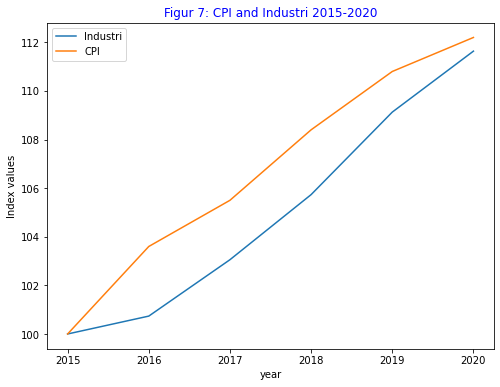

In [45]:
x = CPI_wages['year']
y = CPI_wages[['Industri','CPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("Figur 7: CPI and Industri 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Industri', 'CPI'])
plt.show

Comment:  
Figure 7 shows that annual wage growth in this industry has been lower than inflation in all the years in the period. This means that employees in this industry have had a decline in real wages in all years during the period, and the period as a whole.

4.3.6. Real wages Development within Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning

<function matplotlib.pyplot.show(close=None, block=None)>

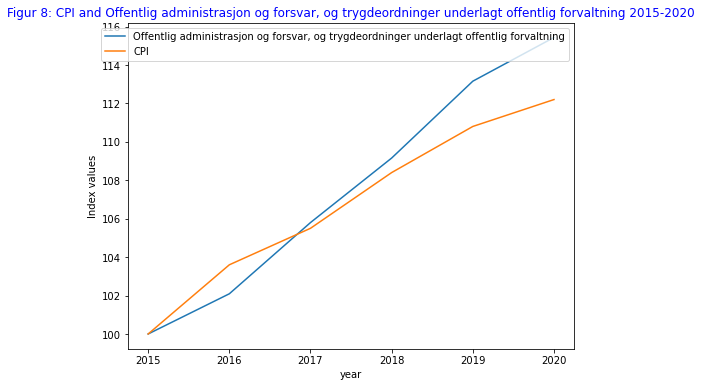

In [46]:
x = CPI_wages['year']
y = CPI_wages[['Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning','CPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("Figur 8: CPI and Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Offentlig administrasjon og forsvar, og trygdeordninger underlagt offentlig forvaltning', 'CPI'])
plt.show

Comment:  
We see from figure 8 that within this industry, the growth in annual wages has been higher than the price growth since 2017. Overall, there has been real wage growth in the period.

4.3.7. Real wages development within Undervisning

<function matplotlib.pyplot.show(close=None, block=None)>

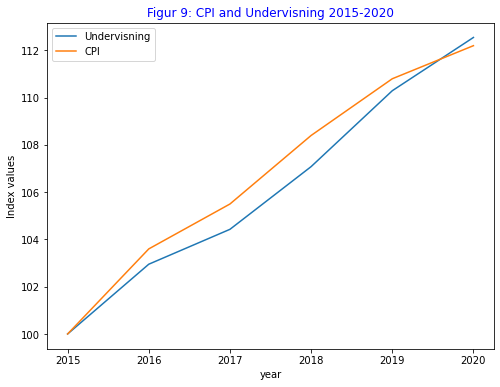

In [47]:
x = CPI_wages['year']
y = CPI_wages[['Undervisning','CPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("Figur 9: CPI and Undervisning 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Undervisning', 'CPI'])
plt.show

Comment:  
We see from Figure 9 that in most years of the period, the price growth has been higher than annual wage growth. For the entire period as a whole, there has been a small increase in real wages.

4.3.8. Real wages development within Varehandel, reparasjon av motorvogner

<function matplotlib.pyplot.show(close=None, block=None)>

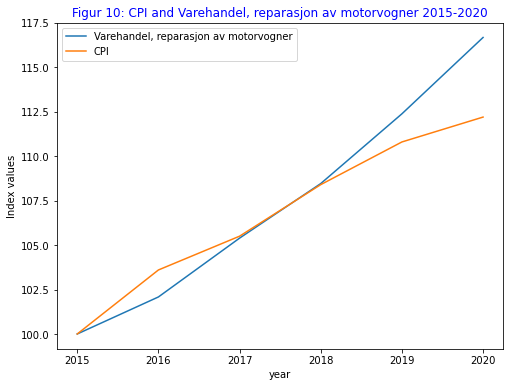

In [48]:
x = CPI_wages['year']
y = CPI_wages[['Varehandel, reparasjon av motorvogner','CPI']]
plot, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('Index values')
ax.set_title("Figur 10: CPI and Varehandel, reparasjon av motorvogner 2015-2020", color="blue")
ax.plot(x,y)
ax.legend(['Varehandel, reparasjon av motorvogner', 'CPI'])
plt.show

Comment:  
Figure 10 shows that in recent years the industry has had higher annual wage growth than the general price growth. For the entire period, there has been real wage growth. This industry has the largest real wage growth of all industries.

**5. Conclusion:**  
In this thesis, I have reviewed data for price development and wage development in the period 2015-2020 and find that real wages have generally increased during the period. 

There are great differences between the industries. One of the industries, Industry, has had a real wage decline of 0.5 per cent if we look at the period as a whole. There are also several industries that are just above 0 in real wage development. 
The wage winner is Varehandel, a repair of motor vehicles with a 4 per cent increase in real wages during the period.

These are general figures that cover all annual salaries. This means that, firstly, we cannot say that this is the wage level in the various industries because both management salaries and those with the lowest salaries are included. Secondly, it follows that if an industry has real wage growth in all or part of the period, this does not necessarily mean that all employees in an industry have received it.

It is also worth mentioning that collective bargaining has different meanings in the various industries. This means that compliance with wage formation principles agreed between the main organizations in working life will vary.
